In [226]:
import pandas as pd
stuPer = pd.read_csv("StudentsPerformance.csv")
stuPer.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Predicting test preparation course completion on scores

## Shaping and splitting the data

In [228]:
stuPer.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values so we can go to the next step splitting the data in two sets.

In [229]:
stuPer_train, stuPer_test = train_test_split(stuPer, test_size=0.3, stratify=stuPer['test preparation course'], random_state=42)
print(stuPer_train.shape, stuPer_test.shape)

(700, 8) (300, 8)


## Evaluating the model

In [230]:
stuPer.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [231]:
features= ['math score', 'reading score', 'writing score']
dt_classification = DecisionTreeClassifier(max_depth = 2)
dt_classification.fit(stuPer_train[features], stuPer_train['test preparation course'])

DecisionTreeClassifier(max_depth=2)

In [232]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree_stuPer_tpc")

    # Display in the notebook
    return graph 

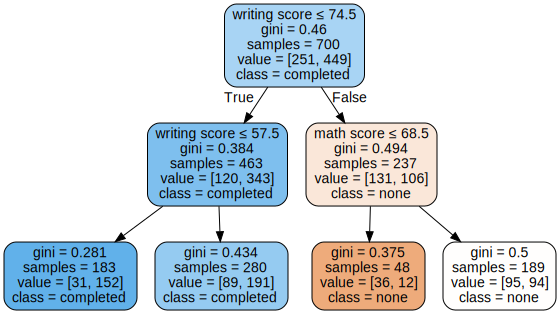

In [233]:
plot_tree_classification(dt_classification, features, stuPer['test preparation course'].unique())

## Testing the model

In [234]:
predictions = dt_classification.predict(stuPer[features])

In [235]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [236]:
predictionsOnTrainset = dt_classification.predict(stuPer_train[features])
predictionsOnTestset = dt_classification.predict(stuPer_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, stuPer_train['test preparation course'])
accuracyTest = calculate_accuracy(predictionsOnTestset, stuPer_test['test preparation course'])

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.6771428571428572
Accuracy on test set 0.6733333333333333


Our model can predict with 67.3% certainty if the students completed the test preparation course, based on their scores for the test. The model was slightly worse at our test set because the two sets can't be exactly identical and it bases it's decisions on the training set so sometimes it gets things wrong because the conclusion it takes is not a real correlation but something that happens in our training set.

# Predicting the parental level of education by scores

## Splitting the data

In [237]:
tuPer_train, stuPer_test = train_test_split(stuPer, test_size=0.3, stratify=stuPer['parental level of education'], random_state=42)
print(stuPer_train.shape, stuPer_test.shape)

(700, 8) (300, 8)


## Evaluating the model

In [238]:
features= ['math score', 'reading score', 'writing score']
dt_classification = DecisionTreeClassifier(max_depth = 15)
dt_classification.fit(stuPer_train[features], stuPer_train['parental level of education'])

DecisionTreeClassifier(max_depth=15)

In [239]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree_stuPer_ple")

    # Display in the notebook
    return graph 

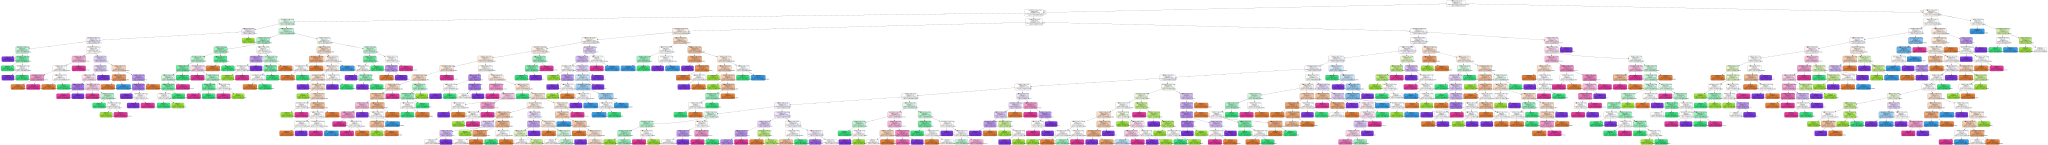

In [240]:
plot_tree_classification(dt_classification, features, stuPer['parental level of education'].unique())

## Testing the model

In [241]:
predictions = dt_classification.predict(stuPer[features])

In [242]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [243]:
predictionsOnTrainset = dt_classification.predict(stuPer_train[features])
predictionsOnTestset = dt_classification.predict(stuPer_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, stuPer_train['parental level of education'])
accuracyTest = calculate_accuracy(predictionsOnTestset, stuPer_test['parental level of education'])

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.8614285714285714
Accuracy on test set 0.6966666666666667


We can now predict with 70% what the parental level of education is by looking at the scores of the student at math, reading and writing. This percentage is lower in our test set than in our training set because of overfitting it sometimes finds things it can base it's decision of that aren't real differences. When testing on new data it hasn't seen before this overfitting fails.